In [1]:
#load libraries
#import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch import np
from torch.autograd import Variable


In [2]:
#intializing neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1   = nn.Linear(561, 200)
        self.fc2   = nn.Linear(200, 100)
        self.fc3   = nn.Linear(100, 7)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
criterion = nn.CrossEntropyLoss() 
optimizer = optim.SGD(net.parameters(), lr=0.005)

In [3]:
#load data and labels
xtrain=np.genfromtxt('X_train.txt')
xtest=np.genfromtxt('X_test.txt')

ytrain=np.genfromtxt('Y_train.txt')
ytest=np.genfromtxt('Y_test.txt')

In [4]:
# Convert data to tensors
xtrain1=torch.from_numpy(xtrain).float()
ytrain1=torch.from_numpy(ytrain).long()
xtest1=torch.from_numpy(xtest).float()
ytest1=torch.from_numpy(ytest).long()

# Create data iterator
import torch.utils.data as data_utils
train = data_utils.TensorDataset(xtrain1, ytrain1)
train_loader = data_utils.DataLoader(train, batch_size=50, shuffle=True)
test = data_utils.TensorDataset(xtest1, ytest1)
test_loader = data_utils.DataLoader(test, batch_size=1, shuffle=False)


In [5]:
# Training over data
epochs=50
error_log=np.zeros([epochs,1])
for epoch in range(epochs): # loop over the dataset multiple times
     
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()        
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        if i % 50 == 49: # print every 100 mini-batches
            print('[%d, %5d] loss: %.5f' % (epoch+1, i+1, running_loss / 50))
            if i % 100 == 99:
                error_log[epoch]=running_loss / 50
            running_loss = 0.0
print('Finished Training')

[1,    50] loss: 1.89847
[1,   100] loss: 1.79709
[2,    50] loss: 1.55328
[2,   100] loss: 1.42537
[3,    50] loss: 1.20698
[3,   100] loss: 1.12235
[4,    50] loss: 1.01627
[4,   100] loss: 0.97413
[5,    50] loss: 0.89620
[5,   100] loss: 0.85535
[6,    50] loss: 0.79046
[6,   100] loss: 0.76324
[7,    50] loss: 0.71217
[7,   100] loss: 0.69085
[8,    50] loss: 0.64106
[8,   100] loss: 0.63435
[9,    50] loss: 0.58941
[9,   100] loss: 0.58569
[10,    50] loss: 0.55447
[10,   100] loss: 0.52544
[11,    50] loss: 0.49552
[11,   100] loss: 0.47965
[12,    50] loss: 0.44946
[12,   100] loss: 0.45000
[13,    50] loss: 0.42424
[13,   100] loss: 0.40557
[14,    50] loss: 0.38886
[14,   100] loss: 0.37476
[15,    50] loss: 0.37612
[15,   100] loss: 0.35028
[16,    50] loss: 0.34335
[16,   100] loss: 0.32781
[17,    50] loss: 0.31867
[17,   100] loss: 0.30740
[18,    50] loss: 0.28767
[18,   100] loss: 0.30083
[19,    50] loss: 0.28514
[19,   100] loss: 0.27724
[20,    50] loss: 0.26708
[20,

Accuracy of the network on the train data: 95 %
Accuracy of the network on the test data: 92 %


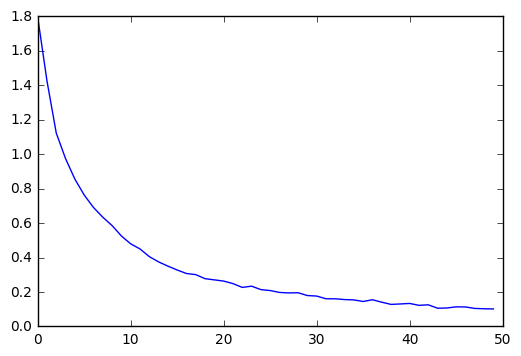

In [6]:
# Calculate accuracy

correct1 = 0
total1 = 0
for data in train_loader:
    features, labels = data
    outputs = net(Variable(features))
    _, predicted = torch.max(outputs.data, 1)
    total1 += labels.size(0)
    correct1 += (predicted == labels).sum()

print('Accuracy of the network on the train data: %d %%' % (100 * correct1 / total1))    
    
correct = 0
total = 0
for data in test_loader:
    features, labels = data
    outputs = net(Variable(features))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the test data: %d %%' % (100 * correct / total))

# Visualize performance over epochs
plt.plot(error_log)
plt.show()